# Homework 2
***
**Name**: Engin Deniz Dogu
***

Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

The rules to be followed for the assignment are:

- Do **NOT** load additional packages beyond what we've shared in the cells below. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

In [1]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import math

### Problem 1
***

There are two functions that need to be completed:

#### normalization(fname, attr, normType)

- This function takes in the location of the data file, the attribute that has to be normalised (one of the values from 'Open','High','Low','Close','Volume', given as column indices) and the type of normalization to be performed ('min_max' or 'z_score')

- Based on the normalisation type that is mentioned, you will have to apply the appropriate formula and return a dictionary where key = original value in the dataset, value = normalised value

- A sample dataset has been provided to you at this location "./data/HistoricalQuotes.csv". Use this dataset to test the functionality you are building.

#### correlation (fname1, attr1, fname2, attr2)

- This function takes in the location of the first data file, the attribute that has to be used in the first file, the location of the second data file and the attribute that has to be used in the second file.

- This function has to calculate the correlation coefficient between the two attributes mentioned in the two files.

- Two Sample datasets have been provided to you in "./data/test1.csv" and "./data/test2.csv" respectively.

- The two sample files have the following attributes 'Open','High','Last','Low','Volume'. Use these two sample files to test the functionality you are building.

Note:
- If the test case fails, one way to debug is to see the output of the testing data and comparing it to your output.
- Initially the test case will be failed as there is no code in the below two functions.

In [2]:
def normalization (fname, attr, normType):
    '''
    Input Parameters:
        fname: Name of the csv file contiaining historical quotes
        attr: The attribute to be normalized 
        normType: The type of normalization 
    Output:
        a dictionary where each key is the original column value and each value is the normalised column value. 
    '''
    #result = {
    #}
    
    # your code here
    df = pd.read_csv(fname) # Read csv
    cols = df.columns.tolist() # List of columns
    column_to_normalize = df[cols[attr]]

    if normType == 'min_max':
        # Min-max normalization formula (map to [0,1])
        # v' = ((v-min)/(max-min))*(max'-min') + min' where max'=1, min'=0
        col_min = df[cols[attr]].min()
        col_max = df[cols[attr]].max()
        v = ((column_to_normalize-col_min)/(col_max-col_min))*(1-0) + 0
        result = dict(zip(column_to_normalize, v))
    elif normType == 'z_score':
        # z-score normalization formula
        # v' = (v-mean)/stdev
        col_mean = df[cols[attr]].mean()
        col_stdev = df[cols[attr]].std()
        v = (column_to_normalize-col_mean)/col_stdev
        result = dict(zip(column_to_normalize, v))
    else:
        print('Allowed values for normType parameter: min_max or z_score')
    
    return result

In [3]:
def correlation (fname1, attr1, fname2, attr2):
    '''
    Input Parameters:
        fname1: name of the first csv file containing historical quotes
        attr1: The attribute to consider in the first csv file (fname1)
        fname2: name of the second csv file containing historical quotes
        attr2: The attribute to consider in the second csv file (fname2)
        
    Output:
        correlation coefficient between attr1 in fname1 and attr2 in fname2
    '''
    correlation_coefficient = 0.0
    
    #TODO: Write code given the Input / Output Paramters.
    # your code here
    df1 = pd.read_csv(fname1) # Read file1
    df2 = pd.read_csv(fname2) # Read file2
    cols1 = df1.columns.tolist() # List of columns (file1)
    cols2 = df2.columns.tolist() # List of columns (file2)
    
    correlation_coefficient = df1[cols1[attr1]].corr(df2[cols2[attr2]])
    
    return correlation_coefficient

In [4]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.loc1 = "data/test1.csv"
        self.loc2 = "data/test2.csv"
        file = open('data/testing_normalization', 'rb')
        self.data_normalization = pickle.load(file)
        file.close()
        file = open('data/testing_correlation', 'rb')
        self.data_correlation = pickle.load(file)
        file.close()
        file = open('data/testing_zscore', 'rb')
        self.zscore = pickle.load(file)
        
    def test0(self):
        """
        Test min_max normalization 
        """
        result = normalization("./data/normalization_test_data.csv", 0, "min_max")
        for key,value in self.data_normalization.items():
            self.assertAlmostEqual(result[key],value, places = 1)
            
    
    def test1(self):
        """
        Test zcore normalization
        """
        result = normalization("./data/normalization_test_data.csv", 1, "z_score")
        for key, value in self.zscore.items():
            self.assertAlmostEqual(result[key], value, places = 1)
    
    def test2(self):
        """
        Test correlation 
        """
        result = correlation('./data/correlation_test_data.csv', 0, "./data/correlation_test_data.csv", 0)
        self.assertAlmostEqual(result,self.data_correlation, places = 1)
       
   
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

...
----------------------------------------------------------------------
Ran 3 tests in 0.074s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### Problem 2
***

There are 4 functions that need to be completed:

1. For each of the graphs, the input function parameters and the expected output has been mentioned below.
2. Use the dataset provided in "./data/HistoricalQuotes.csv" to plot the below graphs.
3. Instructions have been provided within each function regarding which attributes to choose from.
4. The dataset has the following attributes
    - Date
    - Close
    - Volume
    - Open
    - High
    - Low

Note:
- Make sure the dataset you are using is the one mentioned in the problem statement.
- After defining your functions. Create another block to call these functions by passing the attributes mentioned in canvas.

In [5]:
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In [6]:
def temporal_graph():
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : 
    Plot the temporal change of attributes High and Low values
    Return a temporal graph with attributes Date on x-axis and a tuple of High and Low on y-axis displayed
    
    x_data - a python list of Dates using "Date" attribute from the dataset
    y_data - a tuple of the High and Low values respectively. 'High' and 'Low' should be stored as python lists.
             Ex: y_data = (list(df['attr_1']), list(df['attr_2']))
    xlabel, ylabel - A string value representing the axes labels
    title - A string representing the title for the graph
    '''
    df = pd.read_csv('./data/HistoricalQuotes.csv')
    
    # your code here
    x_data = df['Date'].tolist()
    y_data = list(df['High']), list(df['Low'])
    xlabel = 'Date'
    ylabel = 'Quote'
    title = 'Date vs Quote'
    
    return x_data,y_data,xlabel,ylabel,title

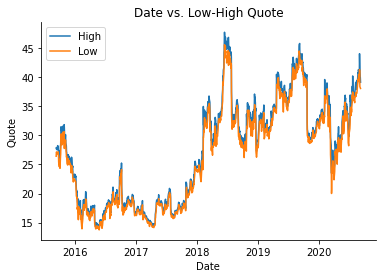

In [7]:
'''#Plot Temporal Graph
import matplotlib.pyplot as plt
df = pd.read_csv('./data/HistoricalQuotes.csv')
df['Date'] = pd.to_datetime(pd.Series(df['Date']))
x_data = df['Date']
y_low = df['Low']
y_high = df['High']
plt.xlabel('Date')
plt.ylabel('Quote')
plt.title('Date vs. Low-High Quote')
plt.plot(x_data, y_high, label='High')
plt.plot(x_data, y_low, label='Low')
plt.legend()
plt.show()
'''

In [8]:
def boxplot():
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    base_color and median_color can be used to set colors in the graph.
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph.
    
    Output : A boxplot with Open and Close attributes on the x-axis displayed
    
    x_data - a tuple of Open and Close values respectively. Open and Close should be stored as a python list.
             Ex: x_data = (list(df['attr_1']), list(df['attr_2']))
    xlabel, ylabel - A string value representing the axes labels
    title - A string representing the title for the graph
    '''
    df = pd.read_csv('./data/HistoricalQuotes.csv')
        
    # your code here
    x_data = list(df['Open']), list(df['Close'])
    xlabel = 'Opening Price'
    ylabel = 'Closing Price'
    title = 'Opening Price - Closing Price'
    
    return x_data,xlabel,ylabel,title

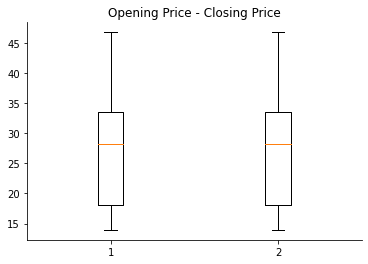

In [9]:
'''#Plot Boxplot
import matplotlib.pyplot as plt
df = pd.read_csv('./data/HistoricalQuotes.csv')
df['Date'] = pd.to_datetime(pd.Series(df['Date']))

x_data = list(df['Open']), list(df['Close'])
plt.title('Opening Price - Closing Price')
plt.boxplot(x_data)
plt.show()
'''

In [10]:
def histogram():
    '''Input : data is the list containing the data points for histogram buckets
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : A histogram of the Volume attribute displayed
    
    data - A python list containing the data associated with the Volume attribute
    x_label, y_label - A string representing the axes labels 
    '''
    df = pd.read_csv('./data/HistoricalQuotes.csv')
    data = []
    
    # your code here
    data = list(df['Volume'])
    x_label = 'Frequency'
    y_label = 'Volume'
    
    return data, x_label, y_label

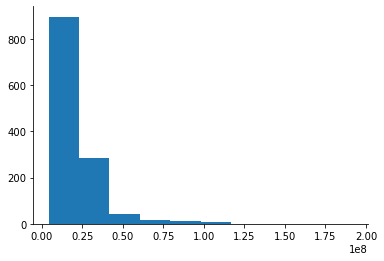

In [12]:
'''#Plot Histogram
import matplotlib.pyplot as plt
df = pd.read_csv('./data/HistoricalQuotes.csv')
df['Date'] = pd.to_datetime(pd.Series(df['Date']))

data = df['Volume']
plt.hist(data, bins=10)
plt.show()
'''